In [10]:
! pip install numpy pandas tensorflow matplotlib seaborn scipy

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.utils import to_categorical

In [12]:
def build_model():
  model = Sequential([
    Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.25),

    Dense(100, activation='softmax')
  ])

  model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

  return model

In [13]:
datagen = ImageDataGenerator(
  rotation_range=20,
  horizontal_flip=True,
)

In [14]:
def load_and_preprocess_data(loader, num_classes, input_shape):
  (x_train, y_train), (x_test, y_test) = loader.load_data()
  
  # Reshape if grayscale to add channel dimension
  if len(x_train.shape) == 3:
    x_train = x_train.reshape(-1, input_shape[0], input_shape[1], 1)
    x_test = x_test.reshape(-1, input_shape[0], input_shape[1], 1)
  
  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)
  
  return x_train, y_train, x_test, y_test

In [15]:
x_train, y_train, x_test, y_test = load_and_preprocess_data(cifar100, 100, (32, 32, 3))

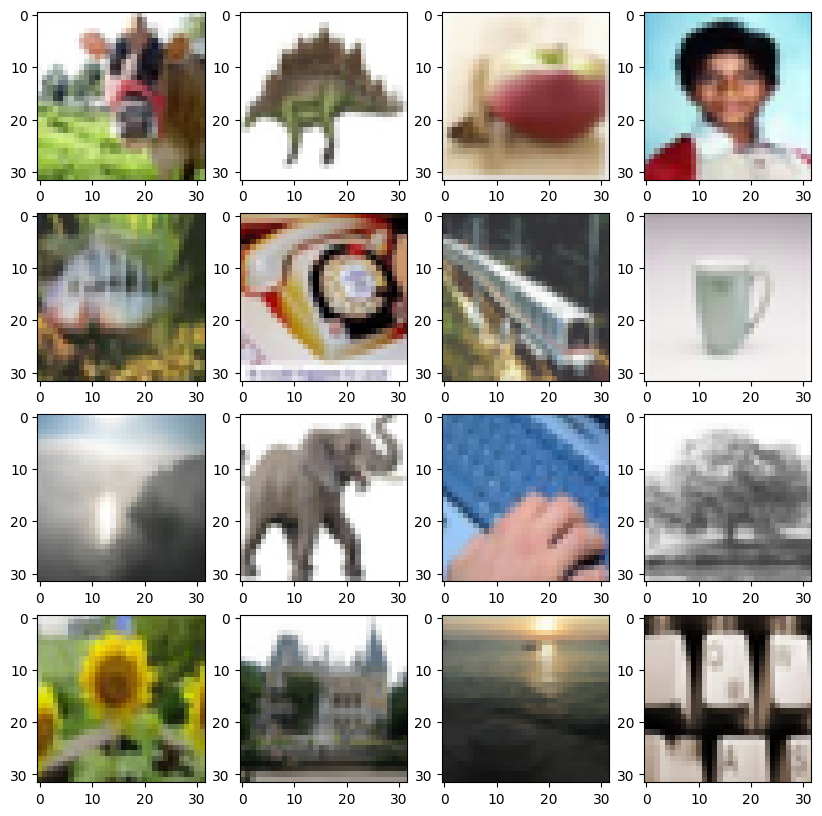

In [16]:
plt.figure(figsize=(10, 10))
for i in range (16):
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[i])

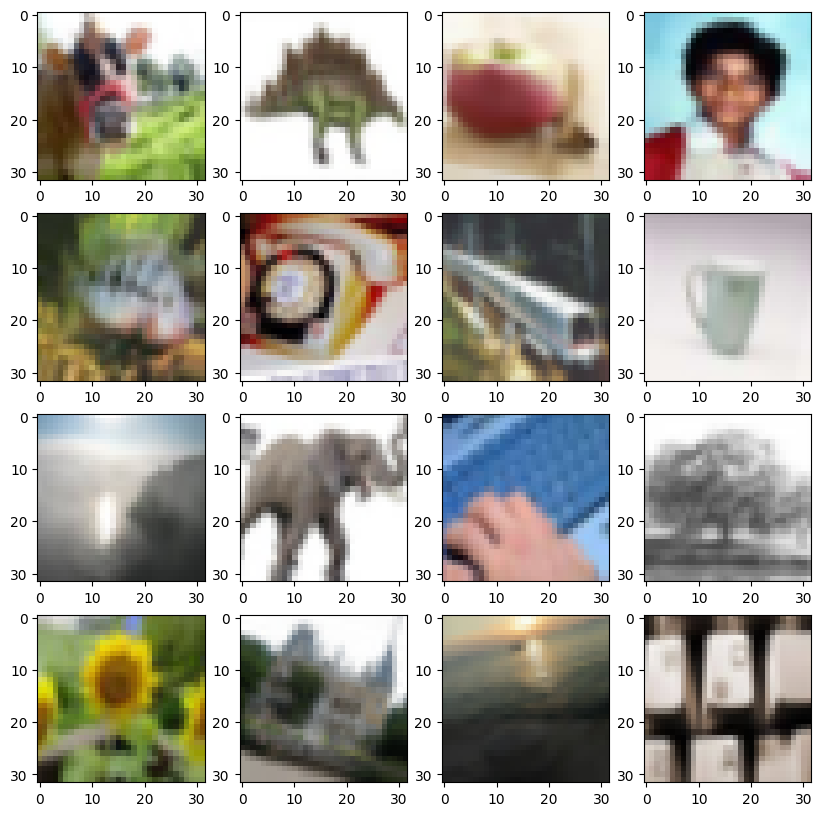

In [17]:
plt.figure(figsize=(10, 10))
for i in range (16):
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(datagen.random_transform(x_train[i]))

In [18]:
model1 = build_model()
model1.fit(
  x_train,
  y_train,
  epochs=100,
  batch_size=64,
  validation_data=(x_test, y_test),
  verbose=1,
)
score1 = model1.evaluate(x_test, y_test, verbose=0)

model2 = build_model()
model2.fit(
  datagen.flow(x_train, y_train, batch_size=64),
  epochs=100,
  validation_data=(x_test, y_test),
  verbose=1,
)
score2 = model2.evaluate(x_test, y_test, verbose=0)
score1, score2

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 234ms/step - accuracy: 0.0252 - loss: 6.5290 - val_accuracy: 0.0650 - val_loss: 4.0222
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 183s 234ms/step - accuracy: 0.0667 - loss: 4.0667 - val_accuracy: 0.0753 - val_loss: 4.0123
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.1001 - loss: 3.8130 - val_accuracy: 0.1212 - val_loss: 3.8781
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.1318 - loss: 3.5871 - val_accuracy: 0.1935 - val_loss: 3.2926
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.1665 - loss: 3.3817 - val_accuracy: 0.2493 - val_loss: 3.0358
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.2030 - loss: 3.1758 - val_accuracy: 0.2740 - val_loss: 2.9010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.2435 - loss: 2.9576 - val_accuracy: 0.3374 - val_loss: 2.5563
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 

/home/super-pc2/miniconda3/envs/biorag/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 232ms/step - accuracy: 0.0302 - loss: 6.1448 - val_accuracy: 0.0811 - val_loss: 4.0348
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.0706 - loss: 4.0608 - val_accuracy: 0.1050 - val_loss: 3.7512
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.1006 - loss: 3.8234 - val_accuracy: 0.1516 - val_loss: 3.4942
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.1287 - loss: 3.6444 - val_accuracy: 0.1875 - val_loss: 3.3107
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.1580 - loss: 3.4594 - val_accuracy: 0.2139 - val_loss: 3.1758
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.1862 - loss: 3.3142 - val_accuracy: 0.2570 - val_loss: 2.9957
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.2091 - loss: 3.1601 - val_accuracy: 0.2793 - val_loss: 2.8432
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.2315 - los

([3.248797655105591, 0.5396999716758728],
 [2.046002149581909, 0.6055999994277954])